In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [2]:
import pandas as pd

In [3]:
from access_science_shared import standardizer

In [4]:
ref_genes = standardizer.reference_genes(9606, 'orp')

In [5]:
from access_literature_data import medline

In [6]:
df_m = medline.select_medline_records(
    columns_sql='''
        medline.pubmed_id,
        medline.pubdate_year''',
    taxon_id='all',
    kind='research',
)


In [7]:
gene2pubmed = medline.gene2pubmed(9606, paper_kind='research', ref_genes=ref_genes)

In [8]:
gene2pubmed = pd.merge(gene2pubmed, df_m)

In [9]:
t = pd.concat(
    [
    gene2pubmed[gene2pubmed['pubdate_year']<=2008]['gene_ncbi'].value_counts().to_frame('before'),
    gene2pubmed[gene2pubmed['pubdate_year'].isin(range(2009, 2016))]['gene_ncbi'].value_counts().to_frame('now'),    
        
    ], axis=1).reindex(ref_genes).fillna(0).rename_axis('gene_ncbi')
    

In [10]:
p = '/Users/tstoeger/Desktop/tcga_2008/41586_2008_BFnature07385_MOESM265_ESM.xls'

In [11]:
df = pd.read_excel(p, sheet_name='Table S6 - Mutation table')

In [12]:
tp = t.rank(pct=True) * 100

In [13]:
tp.loc[:, 'found'] = tp.index.isin(df['Entrez_Gene_Id'])

In [14]:
m = tp[tp['found']==True]

In [15]:
import matplotlib.pyplot as plt

In [16]:
m.shape

(223, 3)

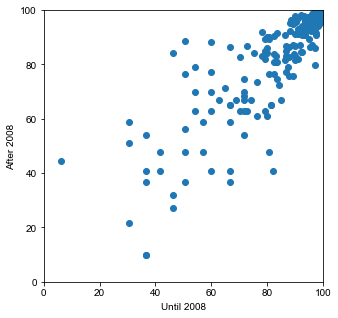

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(m['before'], m['now'])
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.xlabel('Until 2008')
plt.ylabel('After 2008')

plt.savefig('/Users/tstoeger/Dropbox/ratti/tcga_genes.pdf', bbox_inches='tight')

In [18]:
tp.median()

before    50.556451
now       51.102501
found      0.000000
dtype: float64

In [19]:
from scipy.stats import mannwhitneyu, wilcoxon

In [20]:
wilcoxon(tp['before'], tp['now'])

WilcoxonResult(statistic=91830970.5, pvalue=0.48633074188617487)

In [21]:
tp[tp['found']==True].median()

before    92.108274
now       91.772843
found      1.000000
dtype: float64

In [22]:
pd.merge(
    tp[
        (tp['before']<0.7) &
        (tp['now']>0.75) &
        (tp['found']==True)
    ].reset_index(),
    df[['Hugo_Symbol', 'Entrez_Gene_Id']].rename(
        columns={'Entrez_Gene_Id': 'gene_ncbi'}).drop_duplicates())

,before,now,found,Hugo_Symbol,gene_ncbi


In [23]:
df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,Validation_Status,Mutation_Status,COSMIC_COMPARISON(ALL_TRANSCRIPTS),OMIM_COMPARISON(ALL_TRANSCRIPTS),Transcript,CALLED_CLASSIFICATION,PROT_STRING,PROT_STRING_SHORT,PFAM_DOMAIN,Comments
0,A2M,2,genome.wustl.edu,36,12,9116623,9116623,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic File,Novel: Amino Acid,NM_000014,Missense,p.F1290L,p.F1290L,NaN,NaN
1,A2M,2,genome.wustl.edu,36,12,9150104,9150104,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic File,Novel: Amino Acid,NM_000014,Missense,p.G367R,p.G367R,NaN,NaN
2,ABCA3,21,genome.wustl.edu,36,16,2290056,2290056,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic File,Novel: Amino Acid,NM_001089,Missense,p.A521V,p.A521V,NaN,NaN
3,ABCC4,10257,broad.mit.edu,36,13,94484895,94484895,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic File,Novel: Amino Acid,NM_005845,Missense,p.A1279T,p.A1279T,NaN,NaN
4,ABCC4,10257,broad.mit.edu,36,13,94613377,94613377,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic File,Novel: Amino Acid,NM_005845,Missense,p.G770R,p.G770R,ABC_membrane:ABC_tran,NaN
5,ADAM12,8038,genome.wustl.edu,36,10,128009005,128009005,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: Amino Acid,Novel: Amino Acid,NM_003474,Missense,p.D51G,p.D51G,Pep_M12B_propep,NaN
6,ADAM15,8751,hgsc.bcm.edu,36,1,153299877,153299877,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic AminoAcid,Novel: Amino Acid,NM_207197,Missense,p.G741D,p.G741D,NaN,NaN
7,ADAMTSL3,57188,hgsc.bcm.edu,36,15,82233332,82233332,+,Nonsense_Mutation,SNP,...,Valid,Somatic,Novel: Amino Acid,Novel: Amino Acid,NM_207517,Nonsense,p.W81*,p.W81*,TSP_1,NaN
8,ADAMTSL3,57188,hgsc.bcm.edu,36,15,82481336,82481336,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: Amino Acid,Novel: Amino Acid,NM_207517,Missense,p.D1482N,p.D1482N,TSP_1,NaN
9,AIFM1,9131,genome.wustl.edu,36,X,129111203,129111203,+,Missense_Mutation,SNP,...,Valid,Somatic,Novel: No Cosmic AminoAcid,Novel: Amino Acid,NM_004208,Missense,p.D91N,p.D91N,NaN,NaN
